# Abstract

![nn](./img/품질_이상탐지_크로메이트_AI.png)

데이터셋 출처 : 인공지능 중소기업 제조 플랫폼 - [품질 이상탐지,진단(크로메이트) AI 데이터셋](https://www.kamp-ai.kr/front/dataset/AiDataDetail.jsp?AI_SEARCH=&page=2&DATASET_SEQ=25&EQUIP_SEL=&GUBUN_SEL=&FILE_TYPE_SEL=&WDATE_SEL=)

-------

## 1. 분석에 필요한 패키지 불러오기

In [1]:
import os
import datetime
import glob
from math import sqrt

# 데이터 분석을 위한 효율적인 자료구조를 제공
import pandas as pd
import numpy as np

# 데이터 시각화를 위한 그래프 함수 제공
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 데이터 처리를 위한 라이브러리
import cv2
from PIL import Image

# 딥러닝 라이브러리인 tensorflow와 keras. 신경망 구성을 위한 다양한 함수 제공
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

# 머신러닝과 관련된 라이브러리로 머신러닝 모델 및 평가지표 등 분석과 관련된 여러 함수들을 제공
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_curve
from sklearn.metrics import classification_report, roc_auc_score

## 2. 데이터 읽기

In [2]:
class AutoImageClassification:
    def __init__(self, path):
        print("학습 데이터 셋")
        self.train_df =self._create_df(path, '/train')
        print("테스트 데이터 셋")
        self.test_df =self._create_df(path, '/test')
        
    @staticmethod
    def _create_df(path, path2):
        files1 = glob.glob(path + path2 + "/normal/*.png") # 정상 이미지 모두 불러오기
        files2 = glob.glob(path + path2 + "/abnormal/*.png") # 불량 이미지 모두 불러오기
        print('정상: ',len(files1))
        print('불량: ',len(files2))
        df_n = pd.DataFrame()
        df_p = pd.DataFrame()
        df_n['name'] = [x for x in files2]
        df_n['outcome'] =0.
        df_p['name'] = [x for x in files1]
        df_p['outcome'] =1.
        df = pd.concat([df_n, df_p], axis =0, ignore_index =True)
        df = shuffle(df)
        return df
    
    def create_x_and_y(self):
        X = np.array([img_preprocess(p) for p in self.train_df.name.values])
        y =self.train_df.outcome.values
        return X, y
    
    

In [3]:
dir_path = os.getcwd() + '/Dataset_CNN_AI_dataset/data/resized'

aic = AutoImageClassification(path = dir_path)

학습 데이터 셋
정상:  1102
불량:  59
테스트 데이터 셋
정상:  276
불량:  15


In [4]:
# 이미지 데이터 시각화를 위해 이미지 데이터 경로 저장

dir_path_nor = './Dataset_CNN_AI_dataset/data/resized/train/normal/*.png'
dir_path_anor = './Dataset_CNN_AI_dataset/data/resized/train/abnormal/*.png'


train_data_list = glob.glob(dir_path_nor)
test_data_list = glob.glob(dir_path_anor)
print("정상:",len(train_data_list), " 불량 :", len(test_data_list))

정상: 1102  불량 : 59


In [5]:
# 이미지 데이터 뷰어
def img_viewing_4(path):
    fig = plt.figure() # rows*cols 행렬의 i번째 subplot 생성
    rows = 2 # 행
    cols = 2 # 열
    i = 1

    xlabels = ["xlabel", "(a)", "(b)", "(c)", "(d)"]

    for filename in path:
        img = cv2.imread(filename)   # 이미지 읽어오기
        ax = fig.add_subplot(rows, cols, i)  
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # 이미지 보여주기
        ax.set_xlabel(xlabels[i])
        ax.set_xticks([]), ax.set_yticks([])
        i += 1

    plt.show()

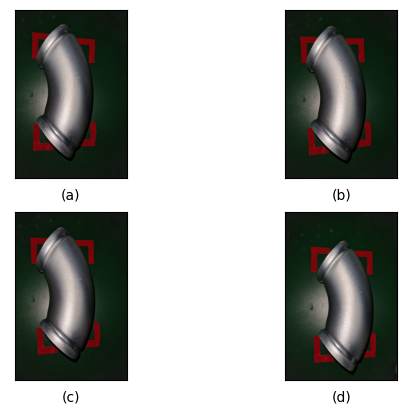

In [6]:
img_viewing_4(train_data_list[0:4]) # 정상 데이터

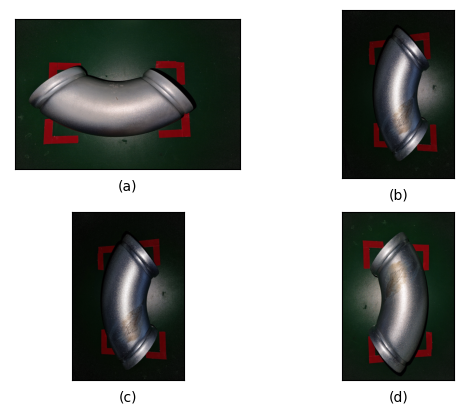

In [7]:
img_viewing_4(test_data_list[0:4]) # 불량 데이터

## 3. 이미지 데이터 전처리

In [8]:
def img_preprocess(img):
    img = Image.open(img)       # PIL 라이브러리를 통해 이미지 불러오기
    img = img.convert('RGB')    # 이미지를 BGR에서 RGB로 변경 
    img = img.resize((256,256)) # 학습을 위해 사이즈 조절 
    img = np.asarray(img)/255   # 학습을 픽셀값을 0~1로 normalize/ 0~255
    return img

In [9]:
X, y = aic.create_x_and_y()

In [10]:
X.shape, y.shape

((1161, 256, 256, 3), (1161,))

## 4. 모델 학습

In [11]:
input_shape = (256, 256, 3)

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)      0         
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dense (Dense)               (None, 1000)              262145000 
                                                        

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(x = X, y = y, epochs=5, validation_split=0.2)

Epoch 1/5


2023-04-21 14:27:30.745280: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


29/29 [==============================] - 23s 767ms/step - loss: 1.3373 - accuracy: 0.9353 - val_loss: 0.1371 - val_accuracy: 0.9270
Epoch 2/5
29/29 [==============================] - 23s 811ms/step - loss: 0.0644 - accuracy: 0.9774 - val_loss: 0.0446 - val_accuracy: 0.9914
Epoch 3/5
29/29 [==============================] - 23s 789ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0105 - val_accuracy: 0.9914
Epoch 4/5
29/29 [==============================] - 22s 771ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 0.9914
Epoch 5/5
29/29 [==============================] - 22s 771ms/step - loss: 0.0026 - accuracy: 0.9989 - val_loss: 0.0141 - val_accuracy: 0.9914


In [14]:
x_test = np.array([img_preprocess(p) for p in aic.test_df.name.values])
y_test = aic.test_df.outcome.values

## 5. 모델 예측

In [15]:
y_pred_ori = model.predict(x_test)
y_pred_ori

array([[9.9998683e-01],
       [9.9997735e-01],
       [9.9989843e-01],
       [9.9999803e-01],
       [9.9999523e-01],
       [9.9999803e-01],
       [9.9997735e-01],
       [9.9992812e-01],
       [9.9994898e-01],
       [9.9996269e-01],
       [9.9999422e-01],
       [2.7747968e-01],
       [9.9999523e-01],
       [9.9992812e-01],
       [9.9999869e-01],
       [9.9994987e-01],
       [9.9999607e-01],
       [9.9999523e-01],
       [9.9994987e-01],
       [9.9999869e-01],
       [9.9999523e-01],
       [9.9996269e-01],
       [9.9995375e-01],
       [9.9994898e-01],
       [9.9994898e-01],
       [9.9999869e-01],
       [9.9999422e-01],
       [9.9998349e-01],
       [9.9997741e-01],
       [9.9997735e-01],
       [9.9999881e-01],
       [9.9999636e-01],
       [9.9994898e-01],
       [9.9999636e-01],
       [9.9994898e-01],
       [9.9999636e-01],
       [9.9997735e-01],
       [9.9999154e-01],
       [9.9999154e-01],
       [9.9998349e-01],
       [3.9543420e-02],
       [9.999944

In [16]:
y_pred_ori = model.predict(x_test)
y_pred = [round(y[0], 0) for y in y_pred_ori]
print("accuracy = ", accuracy_score(y_test, y_pred))
print("recall = ", recall_score(y_test, y_pred))
print("precision = ", precision_score(y_test, y_pred))
print("f1 score = ", f1_score(y_test, y_pred))

accuracy =  0.9965635738831615
recall =  1.0
precision =  0.9963898916967509
f1 score =  0.9981916817359855


(array([ 14.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 277.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

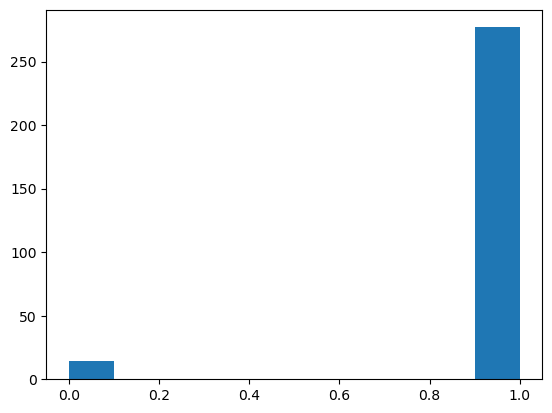

In [17]:
plt.hist(y_pred)

## 6. 모델 평가

In [18]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print("오차 행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현률:{2:.4f}, f1 score: {3:.4f}, AUC: {4:.4f}".format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, y_pred)

오차 행렬
[[ 14   1]
 [  0 276]]
정확도: 0.9966, 정밀도: 0.9964, 재현률:1.0000, f1 score: 0.9982, AUC: 0.9667


In [19]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print(conf_matrix)

[[276   0]
 [  1  14]]


In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)

[0.         0.06666667 1.        ] [0. 1. 1.] [2. 1. 0.]


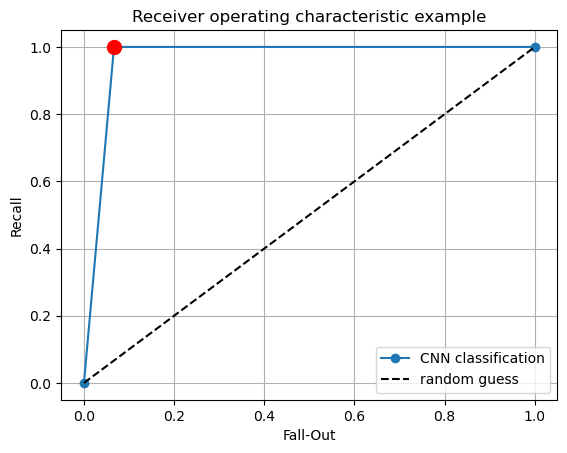

In [21]:
recall = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])
fallout = conf_matrix[1][0]/(conf_matrix[1][0]+conf_matrix[1][1])
plt.plot(fpr, tpr, 'o-', label="CNN classification")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.grid()
plt.legend()
plt.show()

In [22]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      0.93      0.97        15
     class 1       1.00      1.00      1.00       276

    accuracy                           1.00       291
   macro avg       1.00      0.97      0.98       291
weighted avg       1.00      1.00      1.00       291



### 6.1 해석

CNN Model의 평가를 위해 테스트 데이터셋을 사용하여 Predict 함수를 통해 예측하고,<br>
테스트 데이터셋 target 데이터와 비교하여 **정확도가 100%**로 나타난다.<br>

입력 데이터로 **이미지 데이터를 입력하였을 때 나오는 예측값**을 통해 **이미지 데이터가 어떤 품질 결과가 나타나는지 확인**할 수 있다.<br>
이를 통해, **육안검사를 통해 진행하던 품질검사를 자동으로 진행하는 공정으로 진행할 수 있다.**